In [1]:
from slimtp.pipelines import AMPreprocessing
from omegaconf import OmegaConf
from hydra import compose, initialize
from slimtp.modules import AMDataset
from dataset import dino_amdataset

import matplotlib.pyplot as plt 
%matplotlib inline
import pandas as pd
import numpy as np

In [2]:
import nest_asyncio
nest_asyncio.apply()

In [3]:
with initialize(version_base=None, config_path="../../slimtp_configs/living_area/configs/", job_name="test_app"):
    cfg = compose(config_name="config")

In [4]:
ampreproc = AMPreprocessing(cfg)
ampreproc.run()

======== Stage AMPreprocessing ========
100%|██████████| 10/10 [00:00<00:00, 65.88it/s]
[2023-12-21 03:12:15][slimtp.pipelines.am_preprocessing][WARNING] - Drop 1 uncacheable samples.
/root/cape/capelibs/mtp/slimtp/lib/data.py:206: PerformanceWarning: 
your performance may suffer as PyTables will pickle object types that it cannot
map directly to c-types [inferred_type->mixed,key->block2_values] [items->Index(['geometry', 'imagery_source', 'split', 'use', 'cache_key'], dtype='object')]

  df.to_hdf(path, key="data", mode="w")


In [5]:
df = pd.read_hdf(cfg.data_index_path)
df["cache_key"] = df["cache_key"].apply(eval)

In [6]:
class DinoInferenceDataset(AMDataset):
    def __getitem__(self, index: int):
        item = self.get_df_data(index)
        sample_name = item["identifier"]
        x_clean = self.get_aug_item(item, self.t_clean)
        return x_clean, sample_name


In [7]:
amdataset_1 = DinoInferenceDataset(cfg, df)

In [8]:
amdataset_2 = dino_amdataset.DinoInferenceDataset(cfg, df)

In [9]:
# Using slimtp and albumentations
image_1, ident_1 = amdataset_1[0]

In [10]:
# Using custom code as per Franziska`s example
image_2, ident_2 = amdataset_2[0]

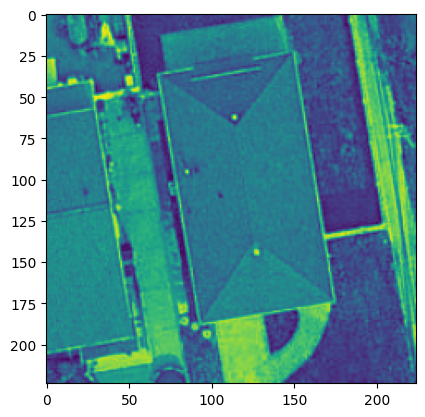

In [22]:
plt.imshow(image_1[0])
plt.show()

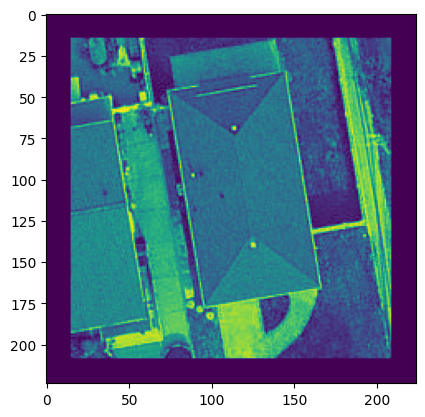

In [24]:
plt.imshow(image_2[1])
plt.show()

In [18]:
image_2.shape

torch.Size([3, 224, 224])

In [25]:
residuals = image_1[0] - image_2[0]

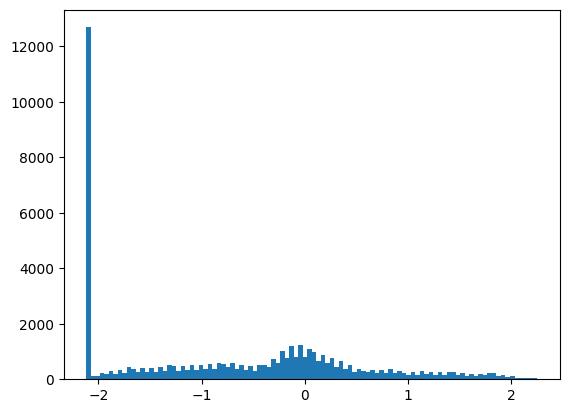

In [31]:
_ = plt.hist(np.ravel(image_2[0]), bins=100)

In [35]:
np.mean(np.ravel(image_1[0]))

-0.08522549

In [36]:
np.mean(np.ravel(image_2[0]))

-0.6691892